# Intensive lectures at RESCEU 
## (17-19th April 2023)


# Hands-on 1: Some basics on Qiskit

## 1-1. Import packages

In [1]:
import numpy as np
from qiskit import *

## 1-2. Draw quantum circuits
### Step1: Specify the number of qubits

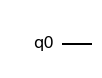

In [2]:
n=1 # the number of qubits
q = QuantumRegister(n)
qc = QuantumCircuit(q) 
qc.draw(output='mpl')
# if you get an error, try it again without "output ='mpl'"
#qc.draw()

Design of output may depend on PC environment.
Now we are in |0> state.

### Step 2: Act quantum gates
* Act X gate

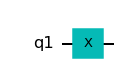

In [3]:
q = QuantumRegister(1)
qc = QuantumCircuit(q) 
qc.x(q[0])
qc.draw(output='mpl')


* Act Z gate

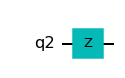

In [4]:
q = QuantumRegister(1)
qc = QuantumCircuit(q) 
qc.z(q[0])
qc.draw(output='mpl')

* Act Hadamard gate

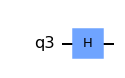

In [5]:
q = QuantumRegister(1)
qc = QuantumCircuit(q) 
qc.h(q[0])
qc.draw(output='mpl')

### Act 
$$R_z (\theta ) = e^{-\frac{i\theta}{2}  Z}, \quad \theta =\frac{\pi}{2}$$

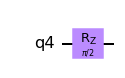

In [6]:
import math  # required to use \pi
q = QuantumRegister(1)
qc = QuantumCircuit(q) 

theta=math.pi/2
qc.rz(theta,q[0])

qc.draw(output='mpl')

### Take 2 qubits and act Controlled X

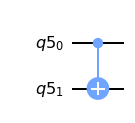

In [7]:
q = QuantumRegister(2)
qc = QuantumCircuit(q) 
qc.cx(q[0],q[1])
qc.draw(output='mpl')

### Act in opposite direction

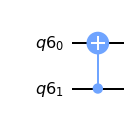

In [8]:
q = QuantumRegister(2)
qc = QuantumCircuit(q) 
qc.cx(q[1],q[0])
qc.draw(output='mpl')

$$CCX|11\rangle \otimes |\psi\rangle \equiv |11\rangle \otimes X|\psi\rangle $$
$$CCX|ij\rangle \otimes |\psi\rangle \equiv |ij\rangle \otimes |\psi\rangle \quad {\rm if}\ (i,j)\neq (1,1) $$

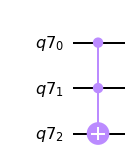

In [9]:
q = QuantumRegister(3)
qc = QuantumCircuit(q) 
qc.ccx(q[0],q[1],q[2])
qc.draw(output='mpl')

## Excercise 1.  Draw the following circuit

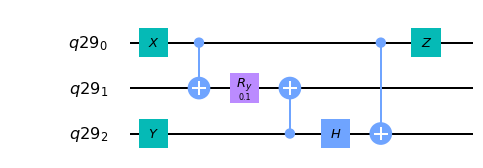

## Answer:

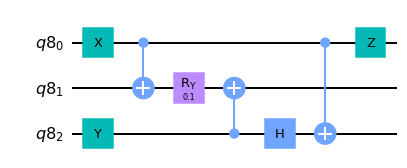

In [10]:
q = QuantumRegister(3)
qc = QuantumCircuit(q) 
qc.x(q[0])
qc.y(q[2])
qc.cx(q[0],q[1])
qc.ry(0.1,q[1])
qc.cx(q[2],q[1])
qc.h(q[2])
qc.cx(q[0],q[2])
qc.z(q[0])
qc.draw(output='mpl')

## 1-3. Make measurement of single qubit cirquits

###  Measure |0>

{'0': 1000}


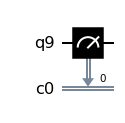

In [11]:
# the number of qubits
n=1 
# prepare both quantum and classical bits
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
# Act measument gate
qc.measure(q[0], c[0]) 

# Use simulator called "qasm_simulator" in Aer (by changing here, we can use real quantum computer)
simulator = Aer.get_backend('qasm_simulator')
# Make measurement 1000 times
job = execute(qc, simulator, shots=1000)
# Get results 
result = job.result()
counts = result.get_counts(qc)
#print(result)
print(counts)

qc.draw(output='mpl')

This means that the state |0> is measured 1000 times out of 1000 times

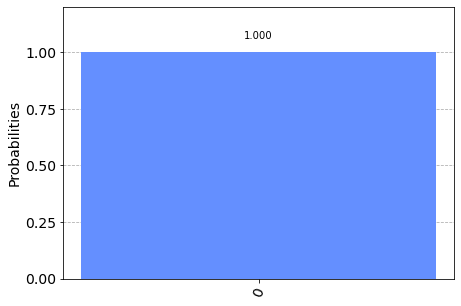

In [12]:
# Plot a histogram
from qiskit.visualization import plot_histogram
plot_histogram(counts)

### Measure X|0>=|1>

{'1': 1000}


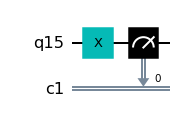

In [13]:
# the number of qubits
n=1 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
#Act X gate
qc.x(q[0])
# Act measument gate
qc.measure(q[0], c[0]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

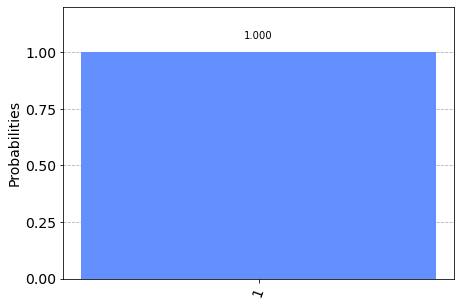

In [14]:
plot_histogram(counts)

### Go to quantum world: measure
$$ H|0\rangle = \frac{1}{\sqrt{2}}(|0\rangle +|1\rangle ) $$

{'1': 489, '0': 511}


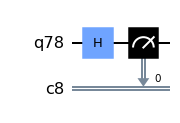

In [21]:
# the number of qubits
n=1 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
#Act H gate
qc.h(q[0])
# Act measument gate
qc.measure(q[0], c[0]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

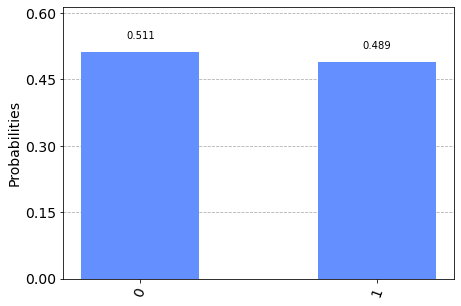

In [22]:
plot_histogram(counts)

### This is not exactly 50:50 because of statistical errors.

## Excercise 2: Measure 
$$ H|0\rangle $$
## 10000 times and confirm that  statistical error is improved

## Answer

{'0': 5004, '1': 4996}


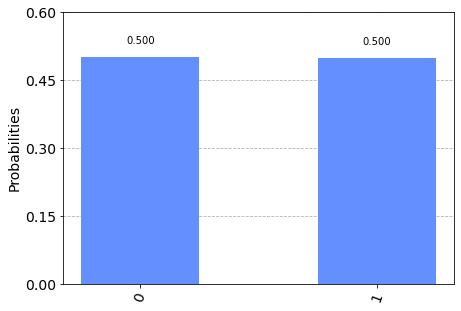

In [23]:
# the number of qubits
n=1 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
#Act H gate
qc.h(q[0])
# Act measument gate
qc.measure(q[0], c[0]) 

# Make measurement 10000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=10000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

plot_histogram(counts)

## Excercise 3: Measure $H|1\rangle $ 1000 times and get Histogram 

## Answer:

{'0': 533, '1': 467}


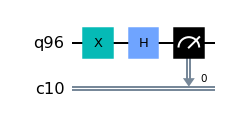

In [24]:
# the number of qubits
n=1 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
#Act X to get |1>
qc.x(q[0])
# Act H
qc.h(q[0])
# Act measument gate
qc.measure(q[0], c[0]) 

#Measure 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

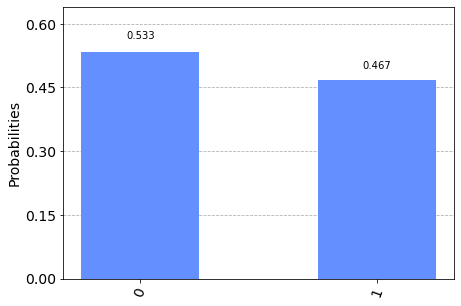

In [25]:
plot_histogram(counts)

Ideally we should get 50:50 since
$$ H|1\rangle =\frac{1}{\sqrt{2}}(|0\rangle -|1\rangle ) $$

## 1-4. Make measurement of 2-qubit cirquits
* Measure |00>

{'00': 1000}


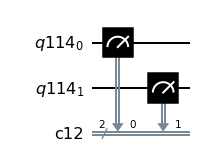

In [27]:
# the number of qubits
n=2 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
# Act measument gate
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

* Measure |01>

{'10': 1000}


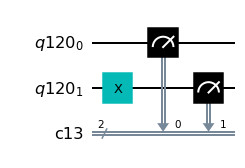

In [28]:
# the number of qubits
n=2 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
# Act X gate on 2nd qubit
qc.x(q[1])
# Act measument gate
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

Note that output appears in opposite order

* Measure 
$$ |0\rangle \otimes H|0\rangle =\frac{1}{\sqrt{2}}(|00\rangle +|01\rangle ) $$

{'10': 488, '00': 512}


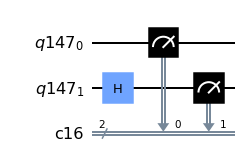

In [31]:
# the number of qubits
n=2 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
# Act X gate on 2nd qubit
qc.h(q[1])
# Act measument gate
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

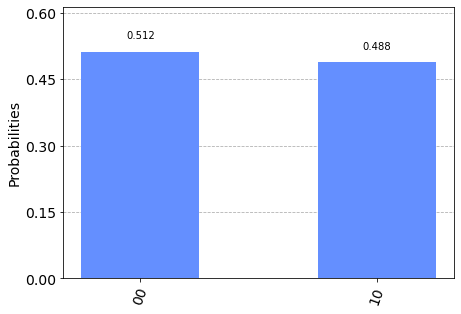

In [32]:
plot_histogram(counts)

## Exercise 4: Check the action of controlled-X:
$$ CX|00\rangle = |00\rangle ,\quad CX|01\rangle =|01\rangle ,\quad CX|10\rangle =|11\rangle ,\quad CX|11\rangle = |10\rangle $$
## by making measurements 1000 times
## (Confirm that RHS's appear in 100%)

## Answer:

{'00': 1000}


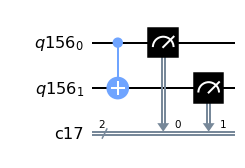

In [33]:
#Check CX|00> =|00>
n=2 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
# Act CX
qc.cx(q[0],q[1])
# Act measument gate
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

{'10': 1000}


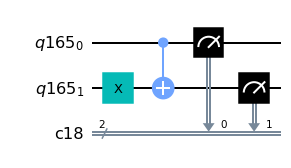

In [34]:
#Check CX|01> =|01>
n=2 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
# Make |01>
qc.x(q[1])
# Act CX
qc.cx(q[0],q[1])
# Act measument gate
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

{'11': 1000}


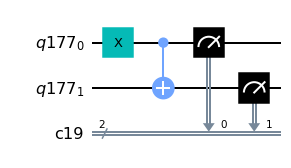

In [35]:
#Check CX|10> =|11>
n=2 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
# Make |10>
qc.x(q[0])
# Act CX
qc.cx(q[0],q[1])
# Act measument gate
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

{'01': 1000}


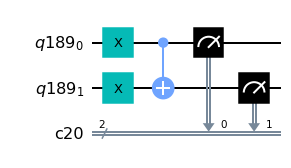

In [36]:
#Check CX|11> =|10>
n=2 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
# Make |11>
qc.x(q[0])
qc.x(q[1])
# Act CX
qc.cx(q[0],q[1])
# Act measument gate
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

## Exercise 5: Construct Bell pairs.
### Ex.5-1: Construct the following Bell state
$$ |B_1^+\rangle \equiv \frac{1}{\sqrt{2}}(|00\rangle +|11\rangle ) = CX H^{(1)}|00\rangle  $$
### and do a consistency check by measuring probabilities having each basis 

## Answer:

{'11': 5037, '00': 4963}


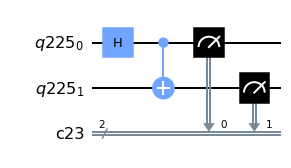

In [39]:
n=2 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
# Get |B_1^+ >
qc.h(q[0])
qc.cx(q[0],q[1])
# Act measument gate
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=10000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

### Ex.5-2: Construct the other Bell states
$$ |B_1^-\rangle \equiv\frac{1}{\sqrt{2}}(|00\rangle -|11\rangle ) ,\quad
|B_2^+\rangle \equiv \frac{1}{\sqrt{2}}(|01\rangle +|10\rangle ) ,\quad
|B_2^-\rangle \equiv \frac{1}{\sqrt{2}}(|01\rangle -|10\rangle )  $$,
### and do a consistency check by measuring probabilities having each basis

$$ |B_1^- \rangle = Z^{(1)} |B_1^+ \rangle $$
$$ |B_2^+ \rangle = X^{(1)} |B_1^+ \rangle $$
$$ |B_2^- \rangle = Z^{(1)} |B_2^+ \rangle $$

## Answer:
### Note
$$ |B_1^- \rangle =Z^{(1)} |B_1^+\rangle ,\quad {\rm or} \quad 
 |B_1^- \rangle =Z^{(2)} |B_1^+\rangle ,\quad {\rm or} \quad 
  |B_1^- \rangle =CX H^{(1)}X^{(1)} |00\rangle \quad {\rm etc...} $$
$$ |B_2^+ \rangle =X^{(1)} |B_1^+\rangle ,\quad {\rm or} \quad 
 |B_2^+ \rangle =X^{(2)} |B_1^+\rangle ,\quad  {\rm etc...} $$
and
$$ |B_2^- \rangle =X^{(2)} |B_1^-\rangle ,\quad {\rm or}\quad 
 |B_2^- \rangle =Z^{(1)} |B_2^+\rangle ,\quad  {\rm etc...} $$


{'00': 510, '11': 490}


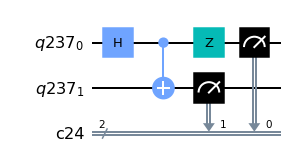

In [40]:
# |B_1^- >
n=2 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
# Get |B_1^+ >
qc.h(q[0])
qc.cx(q[0],q[1])
# Go to |B_1^- >
qc.z(q[0])
# Act measument gate
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

{'01': 513, '10': 487}


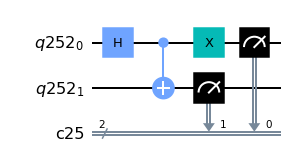

In [41]:
# |B_2^+ >
n=2 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
# Get |B_1^+ >
qc.h(q[0])
qc.cx(q[0],q[1])
# Go to |B_2^+ >
qc.x(q[0])
# Act measument gate
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

{'01': 500, '10': 500}


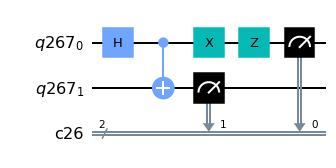

In [42]:
# |B_2^- >
n=2 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
# Get |B_1^+ >
qc.h(q[0])
qc.cx(q[0],q[1])
# Get |B_2^+ >
qc.x(q[0])
# Go to |B_2^- >
qc.z(q[0])
# Act measument gate
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

### Ex.5-3: Show
$$ \langle B_1^- | B_1^+ \rangle =0 ,\quad
\langle B_2^\pm | B_1^+ \rangle =0  $$
### by computing the probability
$$ \left| \langle B_1^- | B_1^+ \rangle \right|^2 ,\quad
 \left| \langle B_2^\pm | B_1^+ \rangle \right|^2 $$

$$ \langle B_1^- | B_1^+ \rangle
=\langle 00|H^{(1)} CX Z^{(1)}  \cdot CX H^{(1)} |00\rangle $$


## Answer:

{'01': 1000}


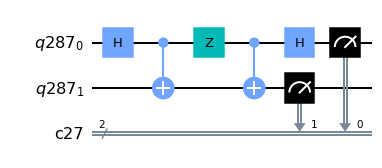

In [43]:
# <B_1^- |B_1^+ >
n=2 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
# Get |B_1^+>
qc.h(q[0])
qc.cx(q[0],q[1])
# Do the inverse procudure to get |B_1^->
qc.z(q[0])
qc.cx(q[0],q[1])
qc.h(q[0])
# Act measument gate
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

{'10': 1000}


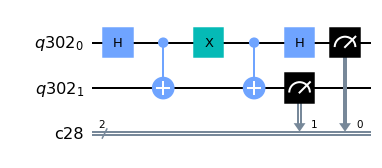

In [44]:
# <B_2^+ |B_1^+ >
n=2 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
# Get |B_1^+>
qc.h(q[0])
qc.cx(q[0],q[1])
# Do the inverse procudure to get |B_2^+>
qc.x(q[0])
qc.cx(q[0],q[1])
qc.h(q[0])
# Act measument gate
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

{'11': 1000}


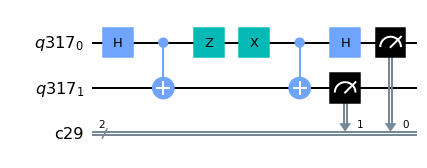

In [45]:
# <B_2^- |B_1^+ >
n=2 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
# Get |B_1^+>
qc.h(q[0])
qc.cx(q[0],q[1])
# Do the inverse procudure to get |B_2^->
qc.z(q[0])
qc.x(q[0])
qc.cx(q[0],q[1])
qc.h(q[0])
# Act measument gate
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

qc.draw(output='mpl')

### Barrier does nothing, but it is sometimes useful to make circuit clearer


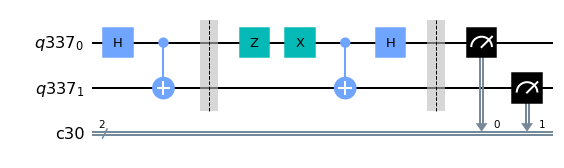

In [46]:
# <B_2^- |B_1^+ >
n=2 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
# Get |B_1^+>
qc.h(q[0])
qc.cx(q[0],q[1])
qc.barrier(q)

# Do the inverse procudure to get |B_2^->
qc.z(q[0])
qc.x(q[0])
qc.cx(q[0],q[1])
qc.h(q[0])
# Act measument gate
qc.barrier(q)
qc.measure(q[0:n],c[0:n]) 


qc.draw(output='mpl')

## 1-5. Submit a job to a real quantum computer

### Get a token from IBM Quantum experience
### (This is only for first time)

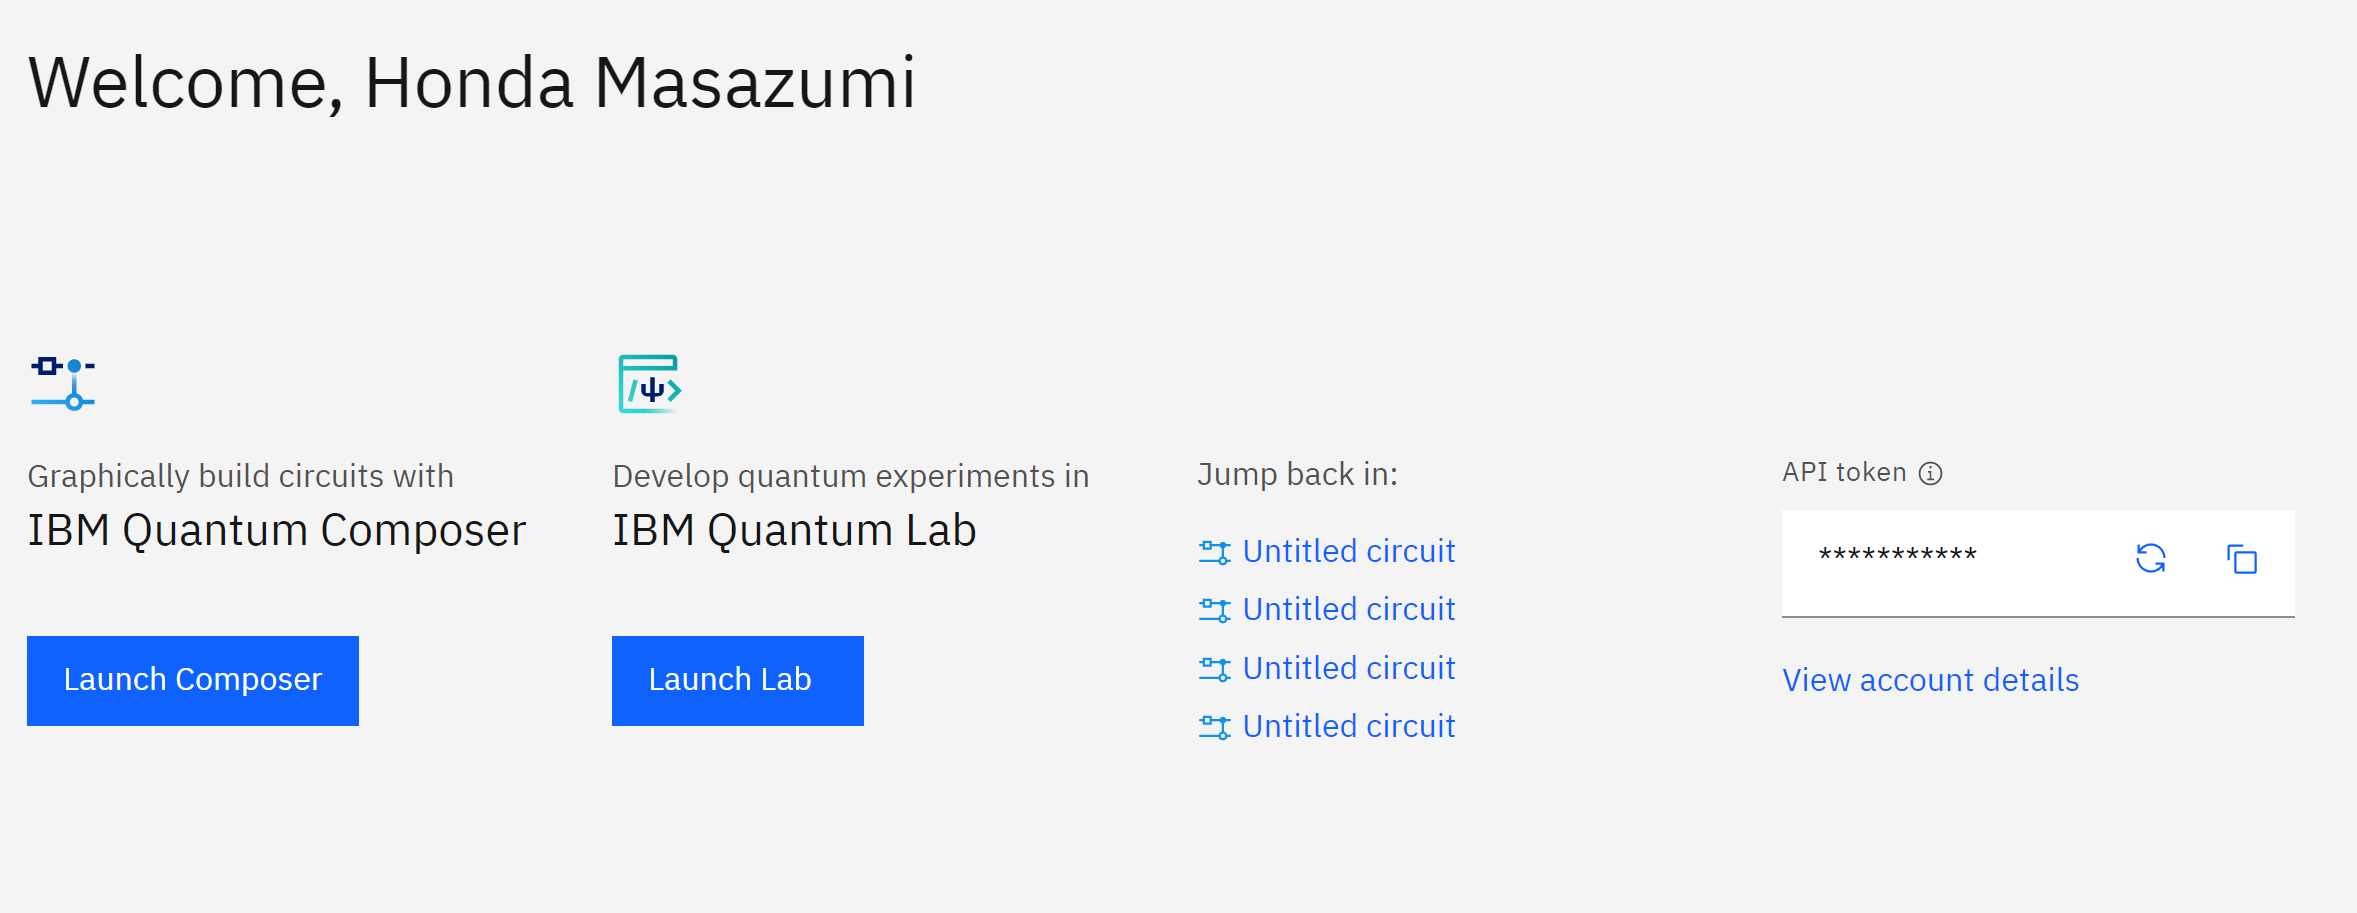

### Paste the token to save it by 
### IBMQ.save_account('your token')

In [47]:
IBMQ.save_account('copy of token')

configrc.store_credentials:WARNING:2023-04-17 17:22:10,268: Credentials already present. Set overwrite=True to overwrite.


### Load your account

In [48]:
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

### Check available devices

In [49]:
provider = IBMQ.get_provider(group='open')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_jakarta') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_lagos') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairo

### Measure $|1\rangle$ 1000 times by a real quantum computer

{'0': 58, '1': 942}


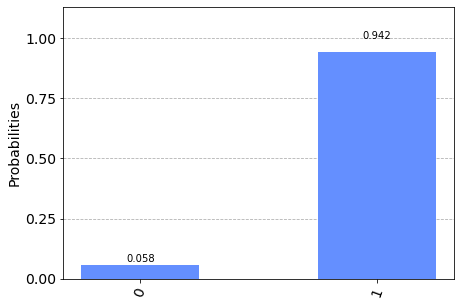

In [50]:
# the number of qubits
n=1 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
#Act X gate
qc.x(q[0])
# Act measument gate
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
## HERE iS THE DIFFERENCE!
simulator = provider.get_backend('ibmq_belem')
#simulator = Aer.get_backend('qasm_simulator')

job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

plot_histogram(counts)

## Excercise 6: Submit a job to measure $H|0\rangle$ 1000 times in a real quantum computer
### (it may take a long time to get a result)

## Answer

{'0': 514, '1': 486}


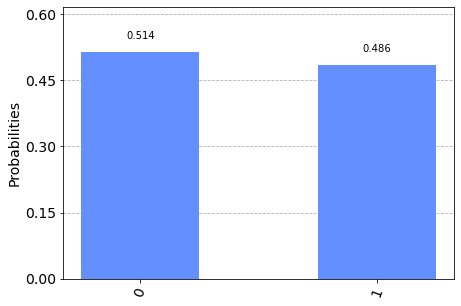

In [10]:
# the number of qubits
n=1 
q = QuantumRegister(n)
c = ClassicalRegister(n)
qc = QuantumCircuit(q,c)
#Act H gate
qc.h(q[0])
# Act measument gate
qc.measure(q[0:n],c[0:n]) 

# Make measurement 1000 times
## HERE iS THR DIFFERENCE!
simulator = provider.get_backend('ibmq_belem')
#simulator = Aer.get_backend('qasm_simulator')

job = execute(qc, simulator, shots=1000)
result = job.result()
counts = result.get_counts(qc)
print(counts)

plot_histogram(counts)